# **Ill-Conditioning**

In [20]:
import numpy as np
import matplotlib.pyplot as plts

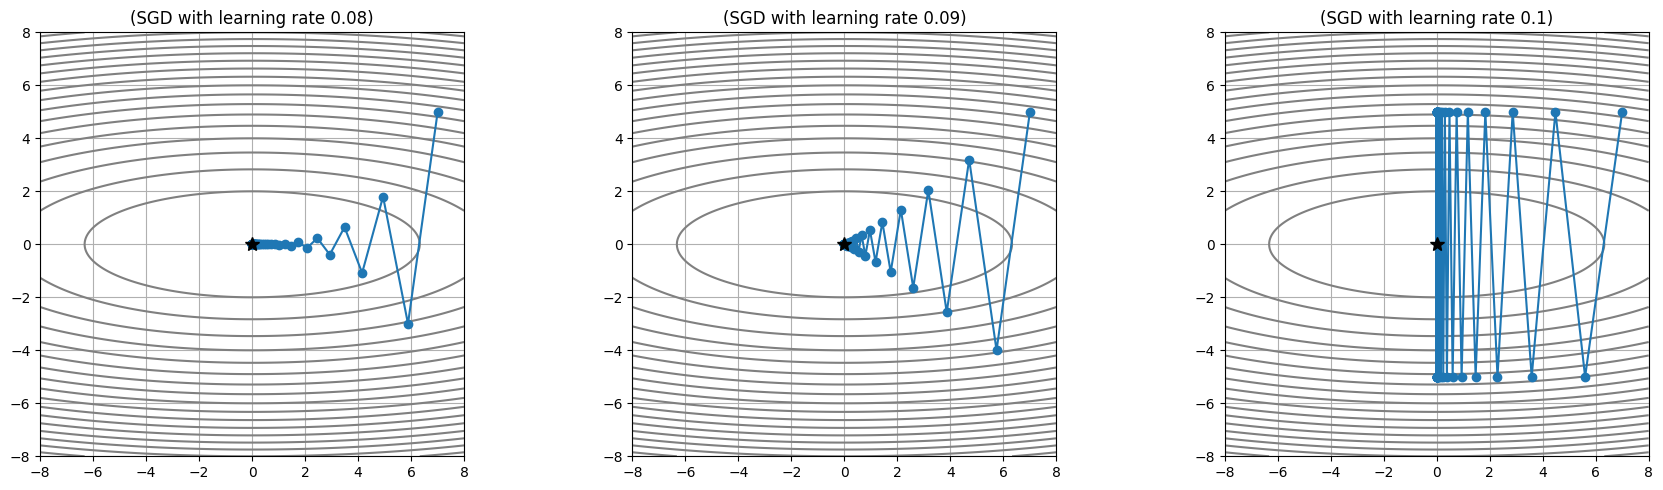

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def grad_fn(v):
    x, y = v
    return np.array([2 * x, 20 * y])  # gradient of f(x, y) = x^2 + 10*y^2

def sgd(x_start, step, grad_fn, iteration=50):
    x = np.array(x_start, dtype='float64')
    trace = [x.copy()]
    for _ in range(iteration):
        grad = grad_fn(x)
        x -= step * grad
        trace.append(x.copy())
        if np.linalg.norm(grad) < 1e-6:
            break
    return np.array(trace)

# 등고선용 데이터
xi = np.linspace(-8, 8, 400)
yi = np.linspace(-8, 8, 400)
X, Y = np.meshgrid(xi, yi)
Z = X**2 + 10 * Y**2

# 초기값
start = [7.0, 5.0]

# 학습률별 경로 추적
traces = {
    0.08: sgd(start, 0.08, grad_fn),
    0.09: sgd(start, 0.09, grad_fn),
    0.10: sgd(start, 0.10, grad_fn)
}

# 시각화
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
learning_rates = [0.08, 0.09, 0.10]

for i, lr in enumerate(learning_rates):
    axs[i].contour(X, Y, Z, levels=20, colors='gray')  # 회색 등고선
    trace = traces[lr]
    axs[i].plot(trace[:, 0], trace[:, 1], marker='o', color="#1f77b4")  # 파란 SGD 경로
    axs[i].plot(0, 0, marker='*', color='black', markersize=10)  # 글로벌 최소점
    axs[i].set_title(f"(SGD with learning rate {lr})")
    axs[i].set_xlim([-8, 8])
    axs[i].set_ylim([-8, 8])
    axs[i].set_aspect('equal')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

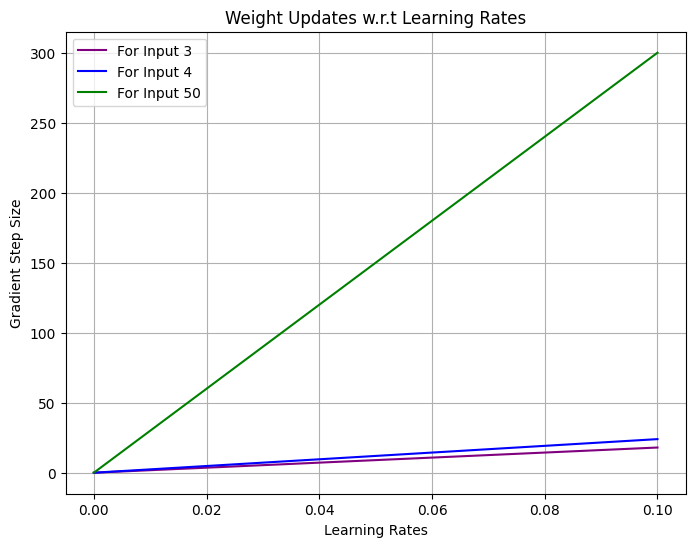

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 입력값 설정
inputs = [3.0, 4.0, 50.0]
learning_rates = np.linspace(0, 0.1, 1000)

# 그래디언트 업데이트 계산
updates = {}
for x in inputs:
    gradient = 60 * x
    updates[x] = learning_rates * gradient

# 시각화
plt.figure(figsize=(8, 6))
colors = ['purple', 'blue', 'green']
for i, x in enumerate(inputs):
    plt.plot(learning_rates, updates[x], label=f"For Input {int(x)}", color=colors[i])

plt.xlabel("Learning Rates")
plt.ylabel("Gradient Step Size")
plt.title("Weight Updates w.r.t Learning Rates")
plt.grid(True)
plt.legend()
plt.show()

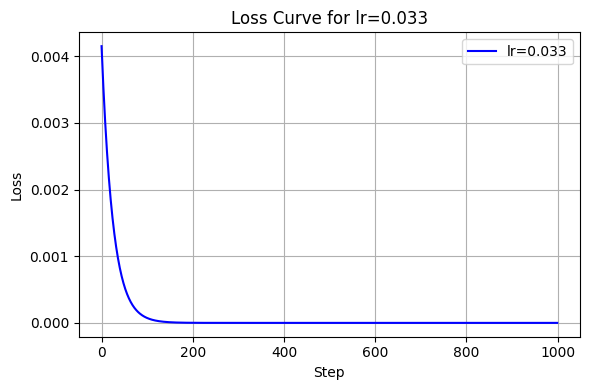

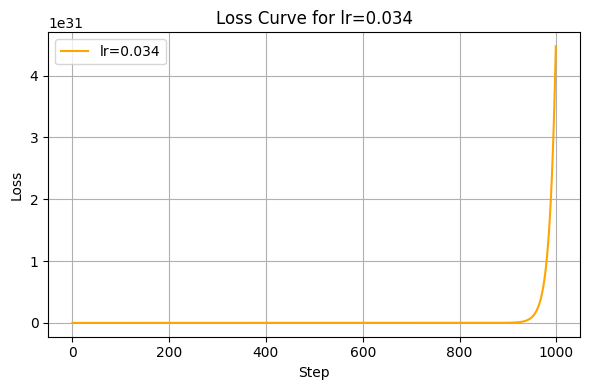

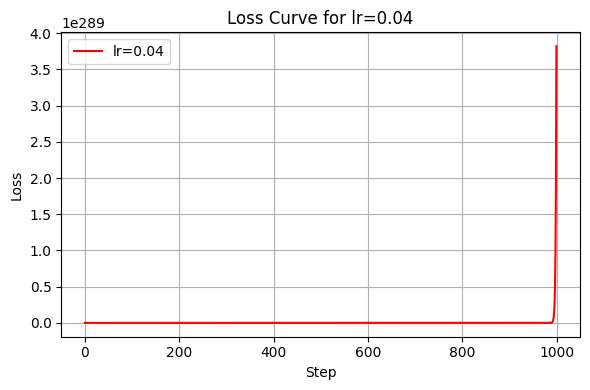

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def f(x):
    return 30 * x**2

def grad_f(x):
    return 60 * x

# 실험 파라미터
learning_rates = [0.033, 0.034, 0.04]
x0 = 3.0 / 255
num_steps = 1000
colors = ['blue', 'orange', 'red']
labels = ['lr=0.033', 'lr=0.034', 'lr=0.04']

# 손실 기록
loss_dict = {}

for lr in learning_rates:
    x = x0
    losses = []
    for step in range(num_steps):
        loss = f(x)
        losses.append(loss)
        gradient = grad_f(x)
        x = x - lr * gradient
    loss_dict[lr] = losses


# 각 학습률별 손실 곡선을 다시 개별적으로 시각화
for i, lr in enumerate(learning_rates):
    plt.figure(figsize=(6, 4))
    plt.plot(loss_dict[lr], label=labels[i], color=colors[i])
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve for {labels[i]}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


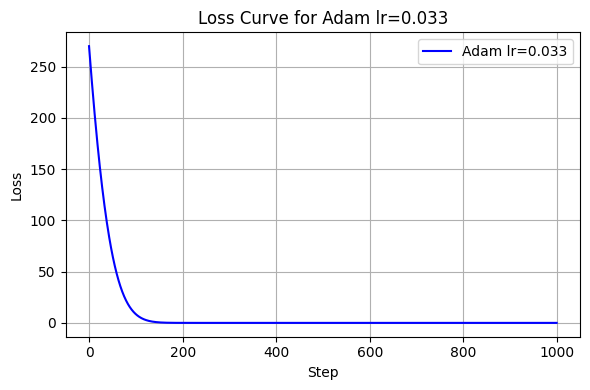

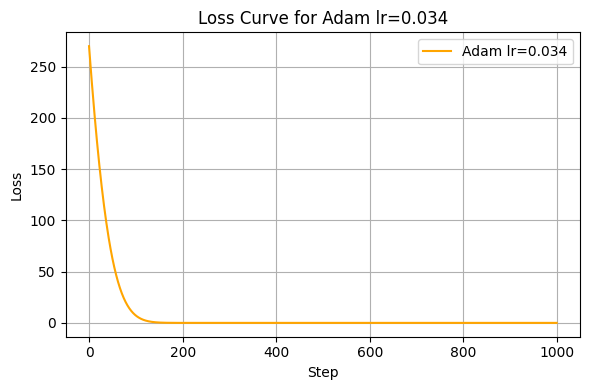

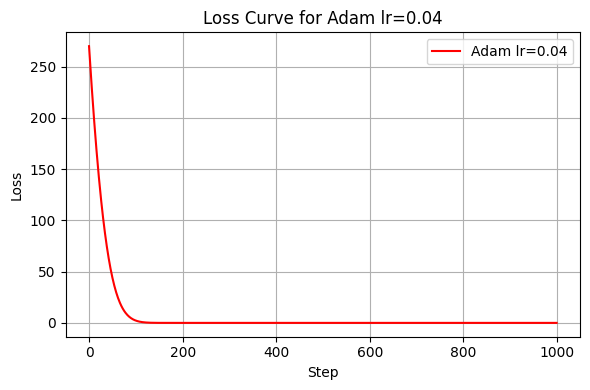

In [32]:

import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def f(x):
    return 30 * x**2

def grad_f(x):
    return 60 * x

# Adam Optimizer 수식 구현
class AdamOptimizer:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.m = 0
        self.v = 0
        self.t = 0

    def step(self, grad):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        return self.lr * m_hat / (np.sqrt(v_hat) + self.eps)

# 실험 파라미터
learning_rates = [0.033, 0.034, 0.04]
x0 = 3.0
num_steps = 1000
colors = ['blue', 'orange', 'red']
labels = ['Adam lr=0.033', 'Adam lr=0.034', 'Adam lr=0.04']

# 손실 기록
loss_dict = {}

for lr in learning_rates:
    x = x0
    losses = []
    optimizer = AdamOptimizer(lr=lr)
    for step in range(num_steps):
        loss = f(x)
        losses.append(loss)
        gradient = grad_f(x)
        update = optimizer.step(gradient)
        x = x - update
        if loss > 1e6:  # 발산 방지
            break
    loss_dict[lr] = losses

# 각 학습률별 손실 곡선을 다시 개별적으로 시각화
for i, lr in enumerate(learning_rates):
    plt.figure(figsize=(6, 4))
    plt.plot(loss_dict[lr], label=labels[i], color=colors[i])
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve for {labels[i]}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# **Cliffs Problem**

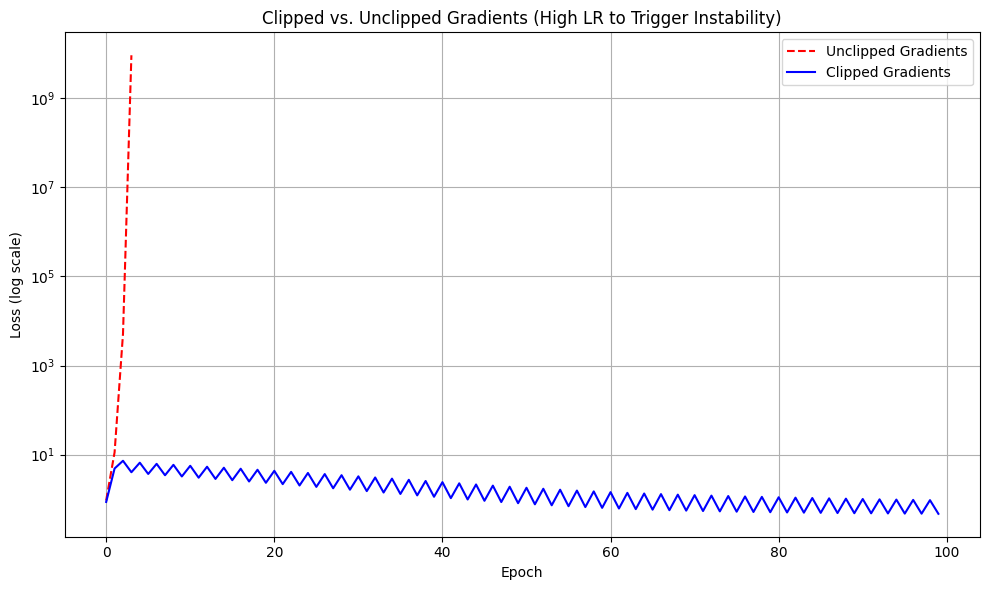

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# ✅ 간단한 MLP 모델
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear1 = nn.Linear(10, 256)  # intentionally overparameterized
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(256, 1)

    def forward(self, x):
        return self.linear2(self.relu(self.linear1(x)))

# 🔢 데이터 생성
torch.manual_seed(42)
x = torch.randn(128, 10)
y = torch.randn(128, 1)

# 💡 손실 함수
loss_fn = nn.MSELoss()
num_epochs = 100
clip_value = 1.0

# 🏋️ 학습 함수
def train(model, use_clip=False):
    optimizer = torch.optim.SGD(model.parameters(), lr=1.0)  # intentionally high lr
    losses = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        pred = model(x)
        loss = loss_fn(pred, y)
        loss.backward()

        if use_clip:
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value)

        optimizer.step()
        losses.append(loss.item())

        if loss.item() > 1e6:  # Early stop
            break

    return losses

# 🚀 모델 학습: 클리핑 적용 vs 미적용
model_unclipped = SimpleModel()
model_clipped = SimpleModel()
losses_unclipped = train(model_unclipped, use_clip=False)
losses_clipped = train(model_clipped, use_clip=True)

# 📈 시각화
plt.figure(figsize=(10, 6))
plt.plot(losses_unclipped, label="Unclipped Gradients", linestyle='--', color='red')
plt.plot(losses_clipped, label="Clipped Gradients", linestyle='-', color='blue')
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Loss (log scale)")
plt.title("Clipped vs. Unclipped Gradients (High LR to Trigger Instability)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Strategies of NN Learning with GD**


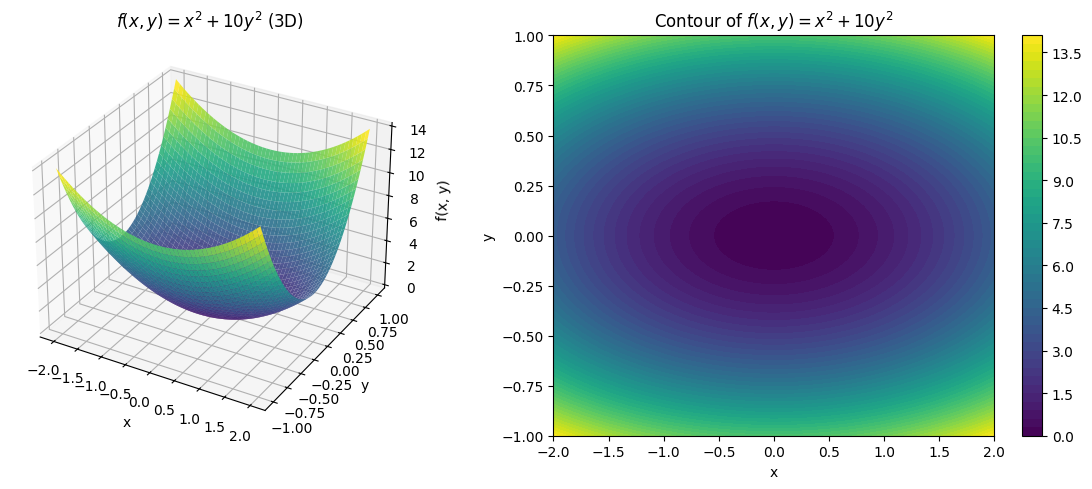

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 함수 정의
def f(x, y):
    return x**2 + 10 * y**2

# 2. 메쉬 그리드 생성
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 3. 시각화
fig = plt.figure(figsize=(12, 5))

# 3D 서피스 플롯
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)
ax1.set_title("$f(x, y) = x^2 + 10y^2$ (3D)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("f(x, y)")

# 등고선 플롯
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
fig.colorbar(contour, ax=ax2)
ax2.set_title("Contour of $f(x, y) = x^2 + 10y^2$")
ax2.set_xlabel("x")
ax2.set_ylabel("y")

plt.tight_layout()
plt.show()

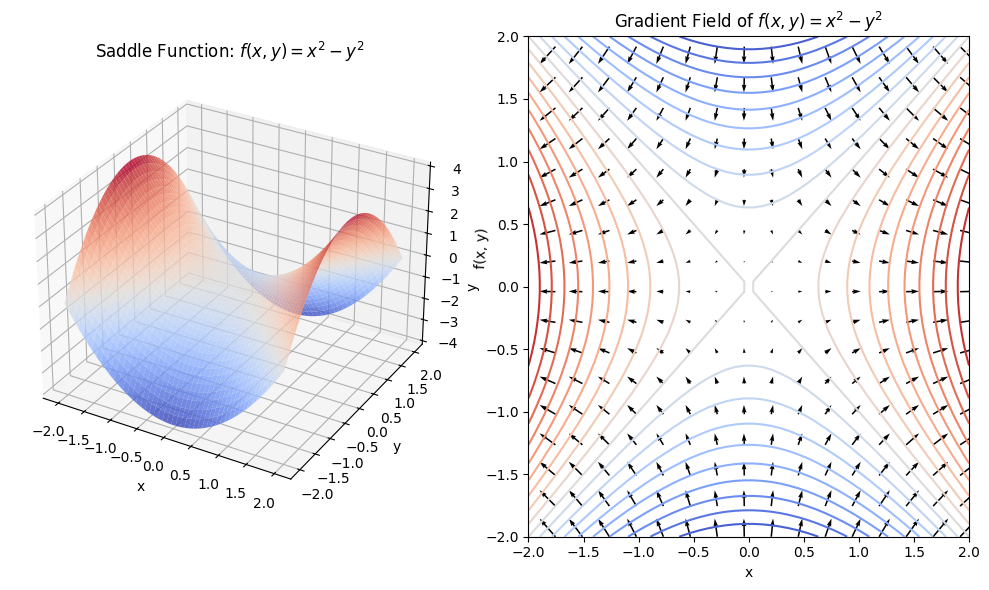

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def saddle_f(x):
    return x[0]**2 - x[1]**2

def grad_f(x):
    return np.array([2 * x[0], -2 * x[1]])  # 주의: gradiecnt는 -2*y로 표시되어야 함

# 메쉬 그리드 생성
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2

# 3D 시각화
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)
ax.set_title("Saddle Function: $f(x, y) = x^2 - y^2$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

# Gradient field 시각화 (2D 평면에 화살표로)
ax2 = fig.add_subplot(122)
ax2.contour(X, Y, Z, levels=20, cmap='coolwarm')
skip = (slice(None, None, 3), slice(None, None, 3))  # 샘플링 간격
U = 2 * X
V = -2 * Y
ax2.quiver(X[skip], Y[skip], U[skip], V[skip], color='black')
ax2.set_title("Gradient Field of $f(x, y) = x^2 - y^2$")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.tight_layout()
plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Optimizer
def sgd(x_start, step, gradient, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    for _ in range(iteration):
        grad = gradient(x)
        x -= grad * step
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot

def momentum(x_start, step, gradient, discount=0.7, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for _ in range(iteration):
        grad = gradient(x)
        pre_grad = pre_grad * discount + grad
        x -= pre_grad * step
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot

def nesterov(x_start, step, gradient, discount=0.7, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for _ in range(iteration):
        x_future = x - step * discount * pre_grad
        grad = gradient(x_future)
        pre_grad = pre_grad * 0.7 + grad 
        x -= pre_grad * step
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot

def adagrad(x_start, step, gradient, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    passing_dot = [x.copy()]
    sum_grad = np.zeros_like(x)
    for _ in range(iteration):
        grad = gradient(x)
        sum_grad += grad * grad
        x -= step * grad / (np.sqrt(sum_grad) + delta)
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot

def adadelta(x_start, step, gradient, momentum=0.9, delta=1e-1, iteration=50):
    x = np.array(x_start, dtype='float64')
    sum_grad = np.zeros_like(x)
    sum_diff = np.zeros_like(x)
    passing_dot = [x.copy()]
    for _ in range(iteration):
        grad = gradient(x)
        sum_grad = momentum * sum_grad + (1 - momentum) * grad * grad
        diff = np.sqrt((sum_diff + delta) / (sum_grad + delta)) * grad
        x -= step * diff
        sum_diff = momentum * sum_diff + (1 - momentum) * (diff * diff)
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot

def rmsprop(x_start, step, gradient, rms_decay=0.9, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    sum_grad = np.zeros_like(x)
    passing_dot = [x.copy()]
    for _ in range(iteration):
        grad = gradient(x)
        sum_grad = rms_decay * sum_grad + (1 - rms_decay) * grad * grad
        x -= step * grad / (np.sqrt(sum_grad) + delta)
        passing_dot.append(x.copy())        
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot

def adam(x_start, step, gradient, beta1=0.9, beta2=0.999, delta=1e-8, iteration=50):
    x = np.array(x_start, dtype='float64')
    sum_m = np.zeros_like(x)
    sum_v = np.zeros_like(x)
    passing_dot = [x.copy()]
    for i in range(iteration):
        grad = gradient(x)
        sum_m = beta1 * sum_m + (1 - beta1) * grad
        sum_v = beta2 * sum_v + (1 - beta2) * grad * grad
        correction = np.sqrt(1 - beta2 ** i) / (1 - beta1 ** i)
        x -= step * sum_m / (np.sqrt(sum_v + delta))
        passing_dot.append(x.copy())
        if abs(sum(grad)) < 1e-6:
            break;
    return x, passing_dot

# **Convex**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_51160\2759472666.py:94: RuntimeWarning: invalid value encountered in scalar divide
  correction = np.sqrt(1 - beta2 ** i) / (1 - beta1 ** i)


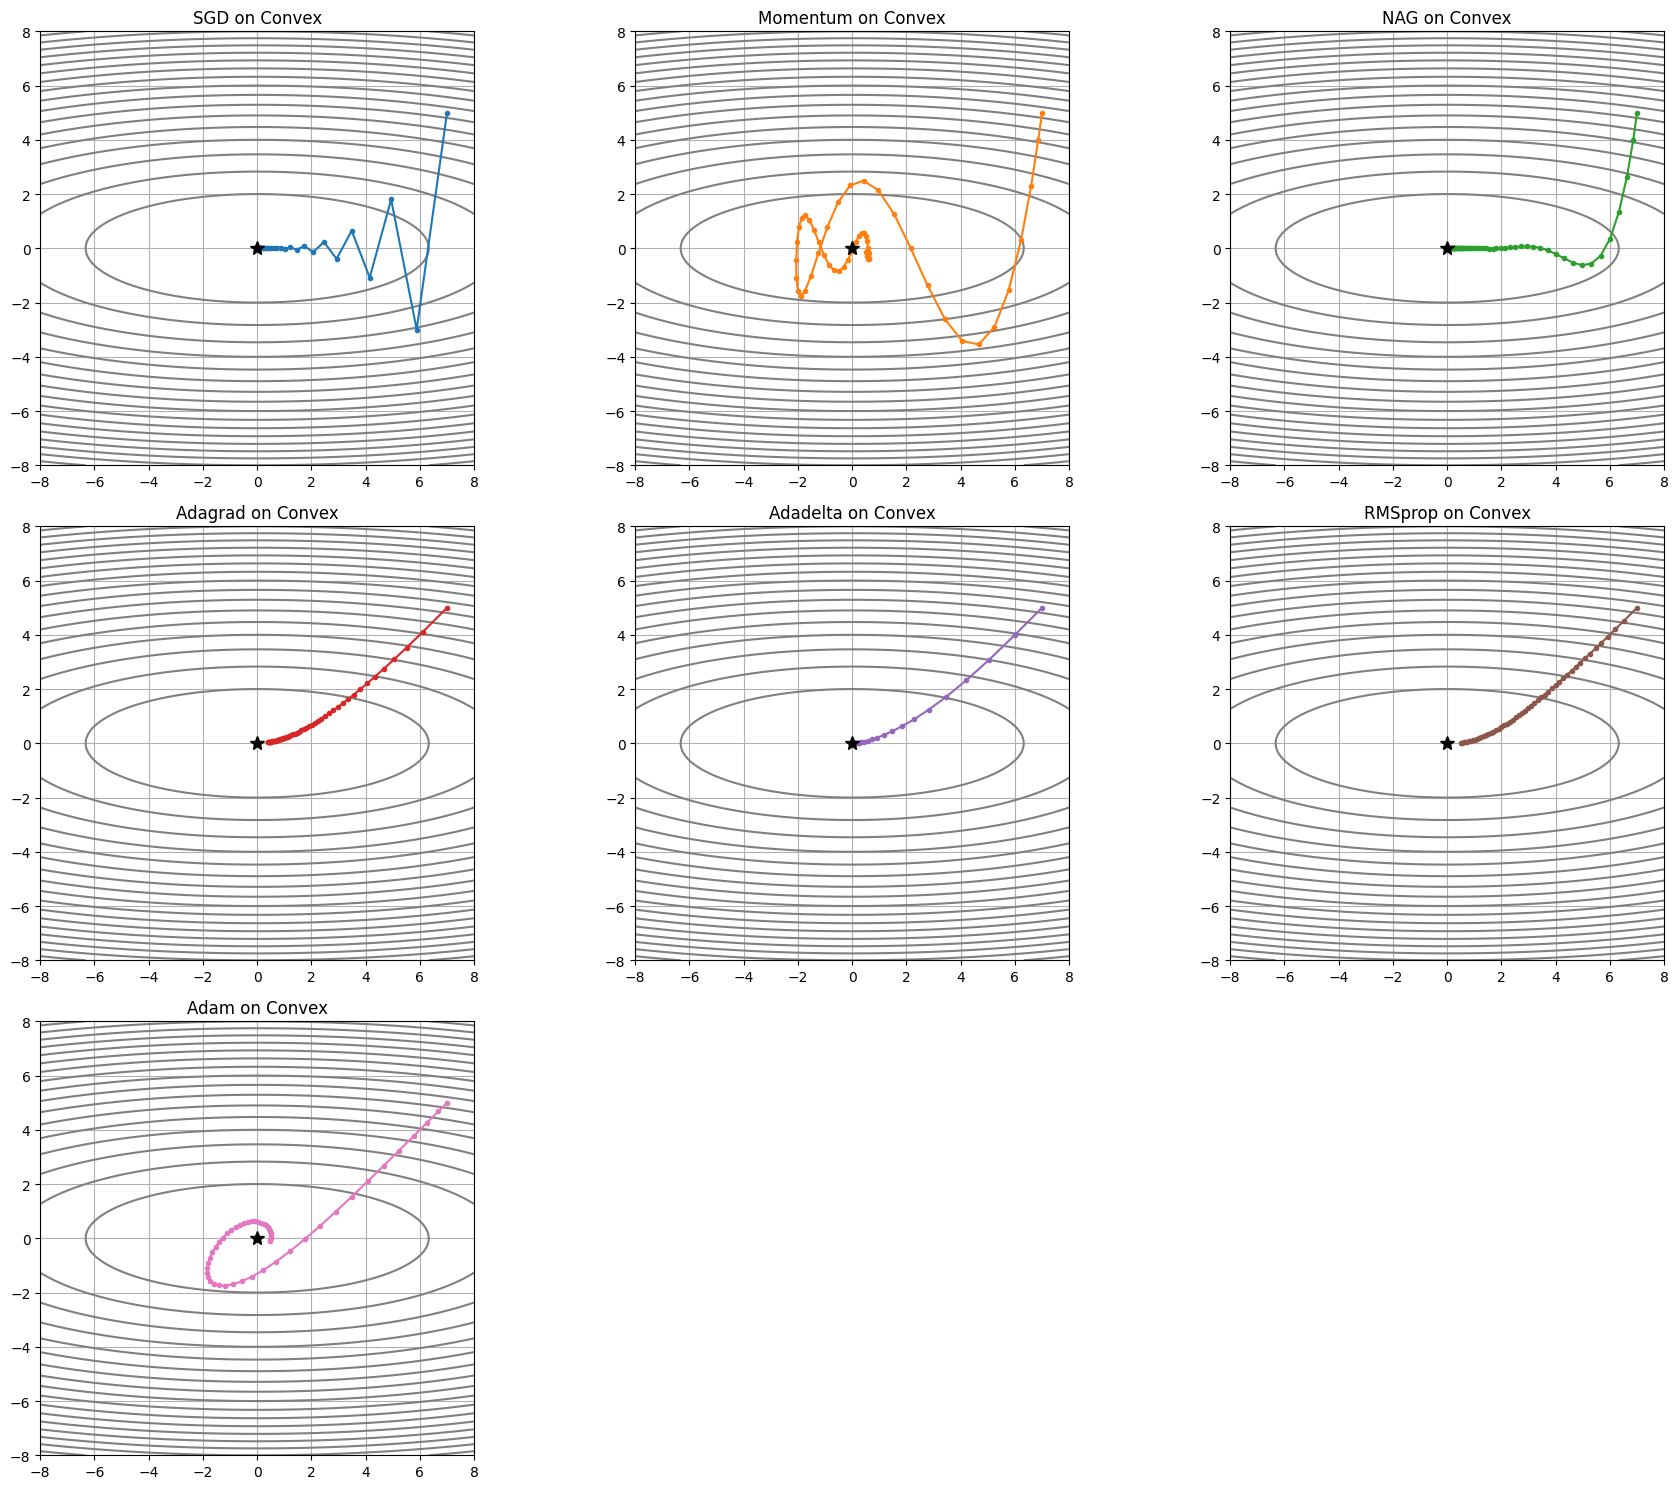

In [29]:
# 등고선용 함수 정의
def grad_f(x):
    return np.array([2 * x[0], 20 * x[1]])


# 시작점 및 반복 수
x_start = [7.0, 5.0]
iterations = 50

# 경로 계산
_, trace_sgd = sgd(x_start, step=0.08, gradient=grad_f, iteration=iterations)
_, trace_momentum = momentum(x_start, step=0.01, gradient=grad_f, discount=0.9, iteration=iterations)
_, trace_nag = nesterov(x_start, step=0.01, gradient=grad_f, discount=0.7, iteration=iterations)
_, trace_adagrad = adagrad(x_start, step=0.9, gradient=grad_f, iteration=iterations)
_, trace_adadelta = adadelta(x_start, step=1.0, gradient=grad_f, momentum=0.9, iteration=iterations)
_, trace_rmsprop = rmsprop(x_start, step=0.15, gradient=grad_f, iteration=iterations)
_, trace_adam = adam(x_start, step=0.1, gradient=grad_f, iteration=iterations)


# 등고선 그리기용 그리드
xi = np.linspace(-8, 8, 400)
yi = np.linspace(-8, 8, 400)
X, Y = np.meshgrid(xi, yi)
Z = X**2 + 10 * Y**2

# 시각화
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
axs = axs.flatten()

optimizer_names = ['SGD', 'Momentum', 'NAG', 'Adagrad', 'Adadelta', 'RMSprop', 'Adam']
traces = [
    trace_sgd, trace_momentum, trace_nag,
    trace_adagrad, trace_adadelta, trace_rmsprop, trace_adam
]
colors = ["#1f77b4","#ff7f0e", "#2ca02c", "#d62728","#9467bd","#8c564b", "#e377c2"]

for i in range(len(traces)):
    axs[i].contour(X, Y, Z, levels=20, colors='gray')
    trace = np.array(traces[i])
    axs[i].plot(trace[:, 0], trace[:, 1], marker='o', color=colors[i], markersize=3)
    axs[i].plot(0, 0, marker='*', color='black', markersize=10)
    axs[i].set_title(optimizer_names[i] + " on Convex")
    axs[i].set_xlim([-8, 8])
    axs[i].set_ylim([-8, 8])
    axs[i].set_aspect('equal')
    axs[i].grid(True)

# 빈 plot 비활성화
for j in range(len(traces), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# **Saddle Point**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_51160\2759472666.py:94: RuntimeWarning: invalid value encountered in scalar divide
  correction = np.sqrt(1 - beta2 ** i) / (1 - beta1 ** i)


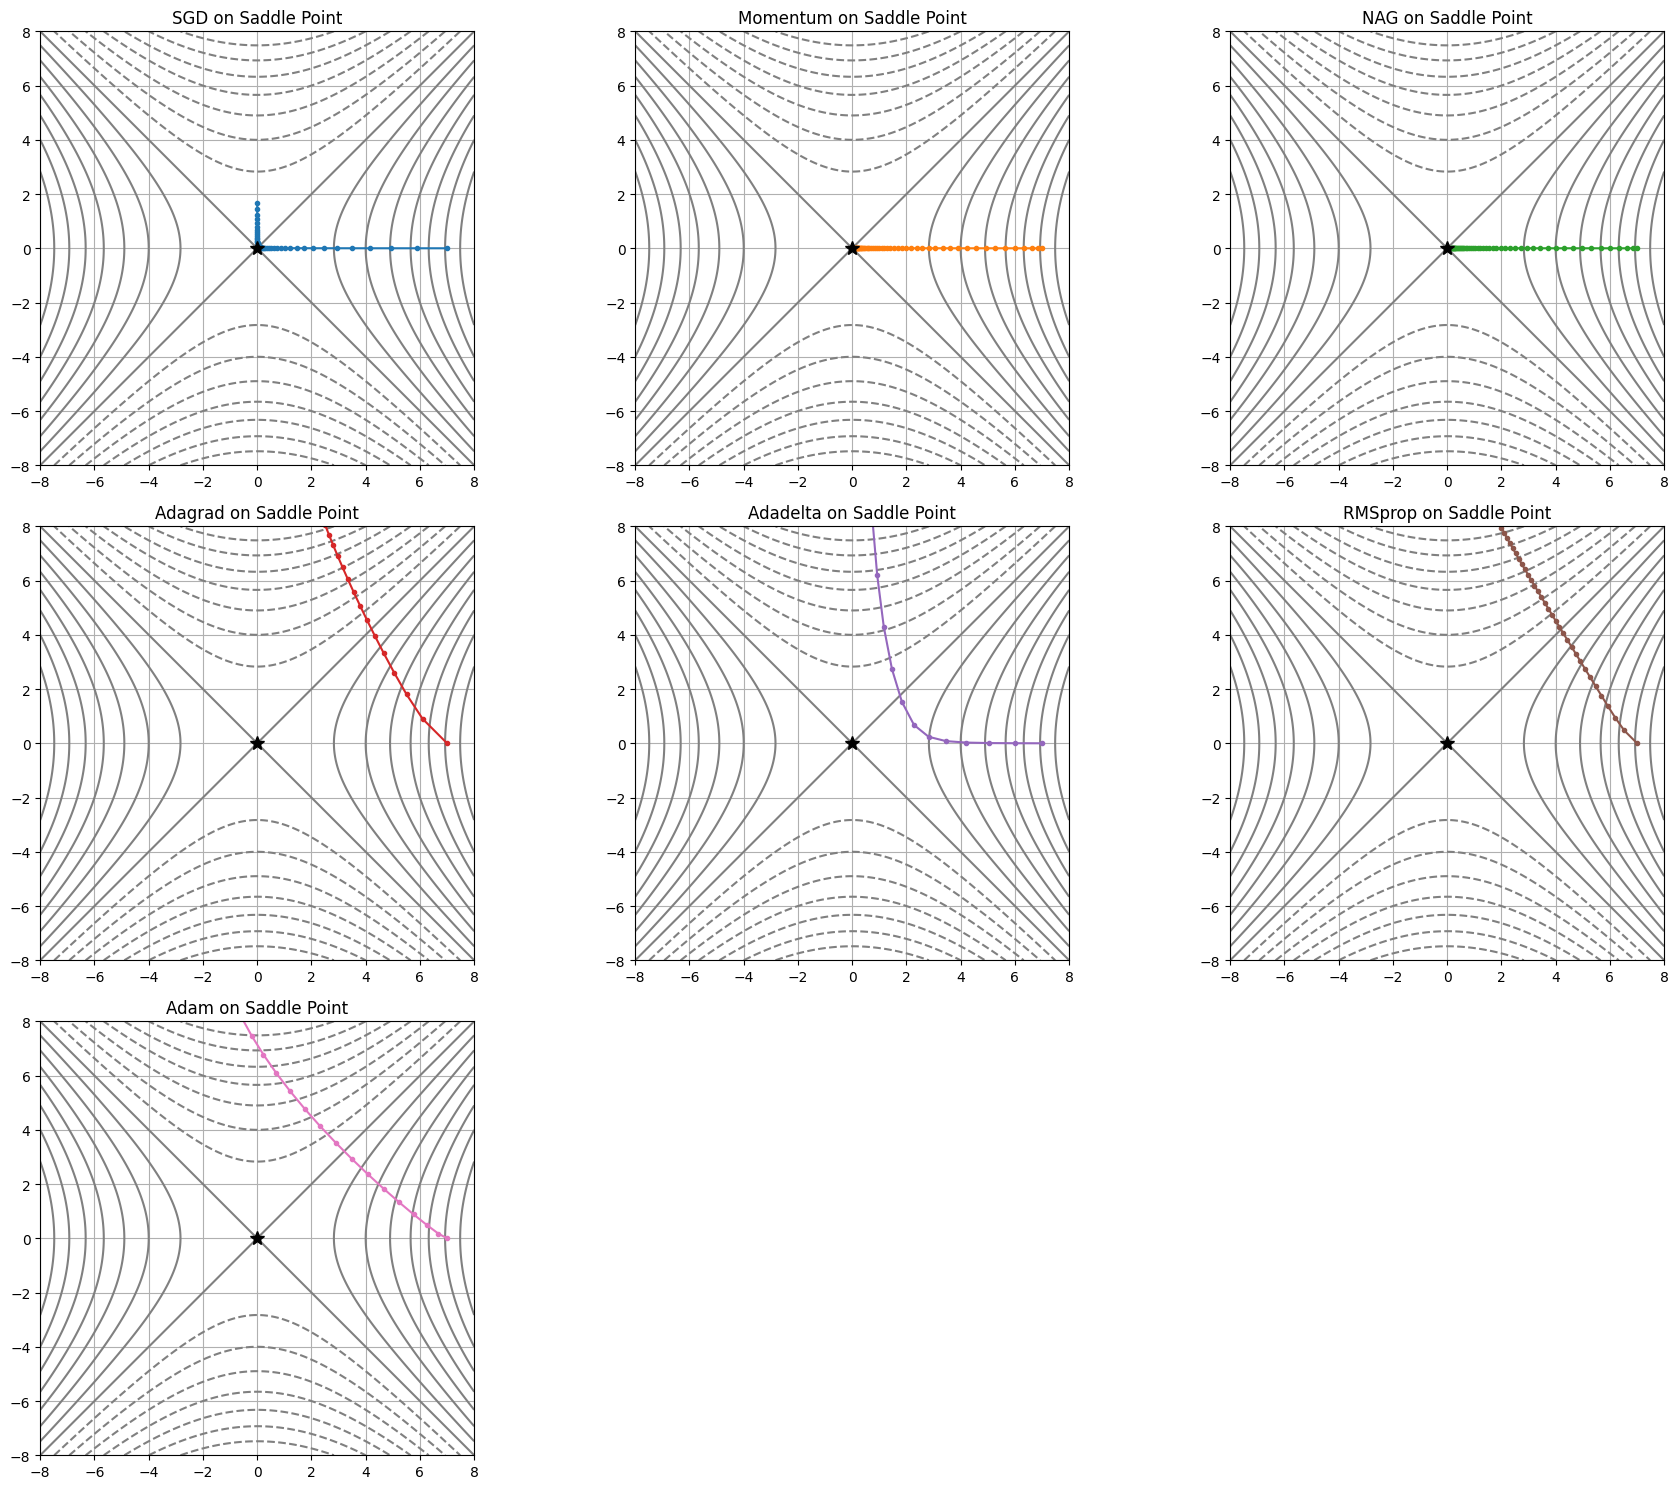

In [30]:
# Saddle point 함수 및 gradient 정의
def saddle_f(x):
    return x[0]**2 - x[1]**2

def grad_saddle_f(x):
    return np.array([2 * x[0], -2 * x[1]])

# 시작점 및 반복 수
x_start = [7.0, 0.001]
iterations = 50

# 경로 계산
_, trace_sgd = sgd(x_start, step=0.08, gradient=grad_saddle_f, iteration=iterations)
_, trace_momentum = momentum(x_start, step=0.01, gradient=grad_saddle_f, discount=0.7, iteration=iterations)
_, trace_nag = nesterov(x_start, step=0.01, gradient=grad_saddle_f, discount=0.7, iteration=iterations)
_, trace_adagrad = adagrad(x_start, step=0.9, gradient=grad_saddle_f, iteration=iterations)
_, trace_adadelta = adadelta(x_start, step=1.0, gradient=grad_saddle_f, momentum=0.9, iteration=iterations)
_, trace_rmsprop = rmsprop(x_start, step=0.15, gradient=grad_saddle_f, iteration=iterations)
_, trace_adam = adam(x_start, step=0.1, gradient=grad_saddle_f, iteration=iterations)


# 등고선 시각화용 meshgrid
xi = np.linspace(-8, 8, 400)
yi = np.linspace(-8, 8, 400)
X, Y = np.meshgrid(xi, yi)
Z = X**2 - Y**2

# 시각화
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
axs = axs.flatten()

optimizer_names = ['SGD', 'Momentum', 'NAG', 'Adagrad', 'Adadelta', 'RMSprop', 'Adam']
traces = [
    trace_sgd, trace_momentum, trace_nag,
    trace_adagrad, trace_adadelta, trace_rmsprop, trace_adam
]
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'navy']
colors = ["#1f77b4","#ff7f0e", "#2ca02c", "#d62728","#9467bd","#8c564b", "#e377c2"]
for i in range(len(traces)):
    axs[i].contour(X, Y, Z, levels=20, colors='gray')
    trace = np.array(traces[i])
    axs[i].plot(trace[:, 0], trace[:, 1], marker='o', color=colors[i], markersize=3)
    axs[i].plot(0, 0, marker='*', color='black', markersize=10)
    axs[i].set_title(optimizer_names[i] + " on Saddle Point")
    axs[i].set_xlim([-8, 8])
    axs[i].set_ylim([-8, 8])
    axs[i].set_aspect('equal')
    axs[i].grid(True)

# 빈 plot 비활성화
for j in range(len(traces), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# **A simple toy dataset**

In [14]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 1. Make Dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)

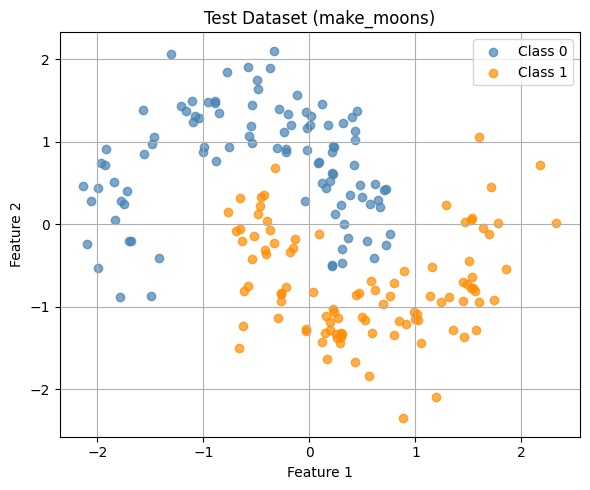

In [15]:
import matplotlib.pyplot as plt

# NumPy로 변환
X_test_np = X_test_tensor.numpy()
y_test_np = y_test_tensor.numpy().ravel()

# 시각화
plt.figure(figsize=(6, 5))
plt.scatter(X_test_np[y_test_np == 0][:, 0], X_test_np[y_test_np == 0][:, 1], 
            color='steelblue', label='Class 0', alpha=0.7)
plt.scatter(X_test_np[y_test_np == 1][:, 0], X_test_np[y_test_np == 1][:, 1], 
            color='darkorange', label='Class 1', alpha=0.7)

plt.title("Test Dataset (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# 2. Define network
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [17]:
# Training function
def train_model(optimizer_name, epochs=50):
    model = SimpleMLP()
    criterion = nn.BCELoss()

    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.1)
    elif optimizer_name == 'Momentum':
        optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
    elif optimizer_name == 'NAG':
        optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, nesterov=True)
    elif optimizer_name == 'AdaGrad':
        optimizer = optim.Adagrad(model.parameters(), lr=0.1)
    elif optimizer_name == 'RMSProp':
        optimizer = optim.RMSprop(model.parameters(), lr=0.01)
    elif optimizer_name == 'AdaDelta':
        optimizer = optim.Adadelta(model.parameters(), lr=1.0)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optimizer_name == 'NAdam':
        optimizer = optim.NAdam(model.parameters(), lr=0.01)
    elif optimizer_name == 'RAdam':
        optimizer = optim.RAdam(model.parameters(), lr=0.01)
    elif optimizer_name == 'AdamW':
        optimizer = optim.AdamW(model.parameters(), lr=0.01)
    else:
        raise ValueError("Unsupported optimizer")

    loss_history = []
    acc_history = []

    for epoch in range(epochs):
        model.train()
        for xb, yb in train_loader:
            preds = model(xb)
            loss = criterion(preds, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            preds = model(X_test_tensor)
            acc = ((preds > 0.5) == y_test_tensor).float().mean().item()
            loss_val = criterion(preds, y_test_tensor).item()
            loss_history.append(loss_val)
            acc_history.append(acc)

    return loss_history, acc_history

In [18]:
# Execute
optimizer_names = ['SGD', 'Momentum', 'NAG', 'AdaGrad', 'RMSProp', 'AdaDelta', 'Adam']
results = {opt: train_model(opt) for opt in optimizer_names}

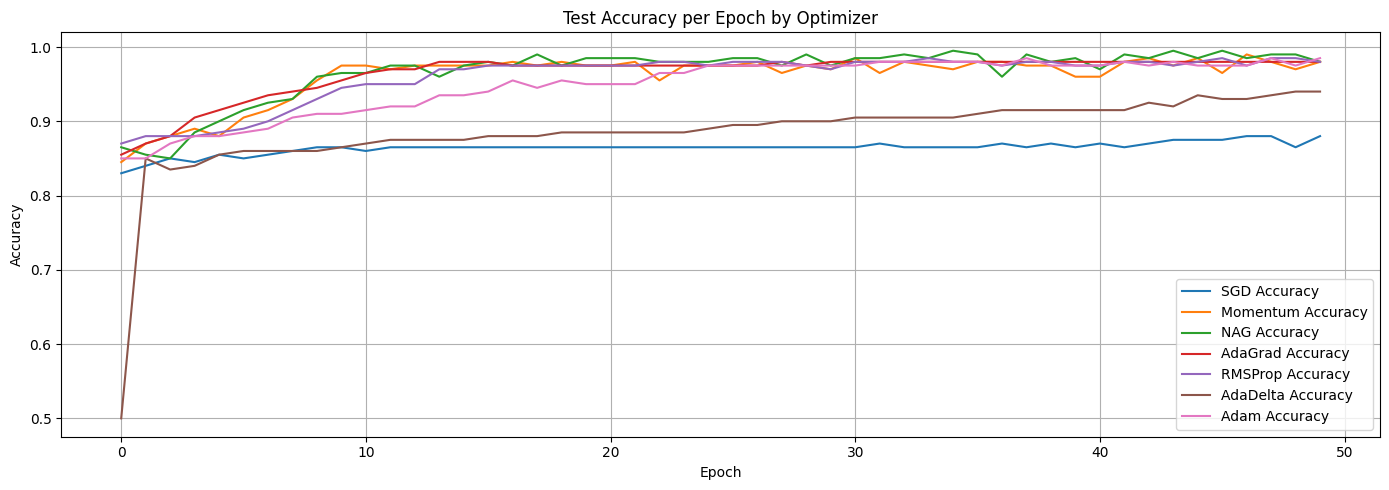

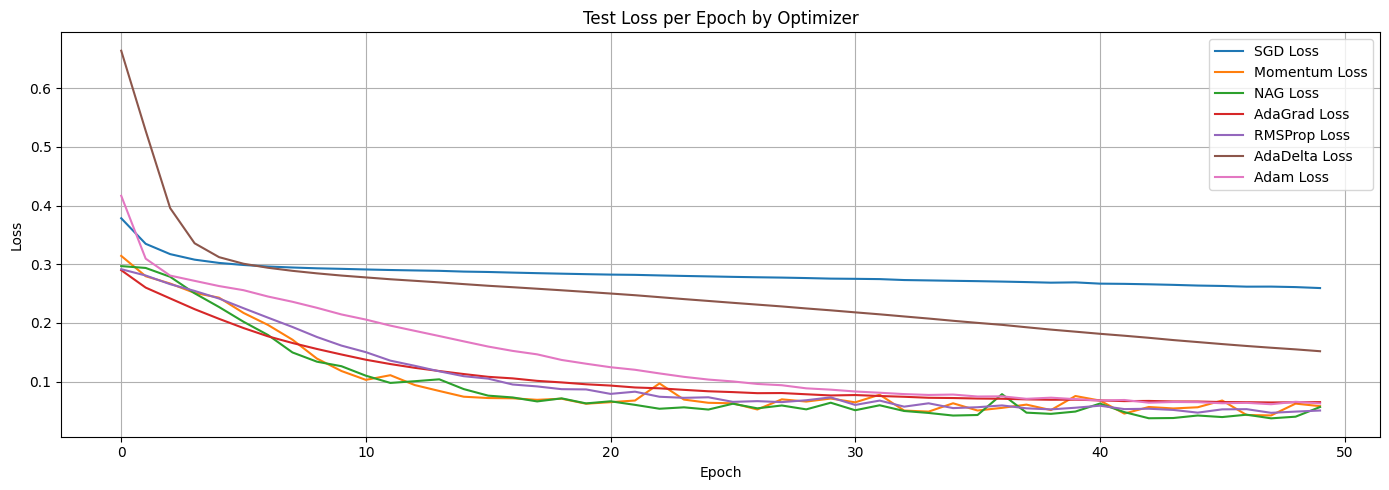

In [19]:
# Visualization
# Accuracy
plt.figure(figsize=(14, 5))
for opt in optimizer_names:
    plt.plot(results[opt][1], label=f'{opt} Accuracy')
plt.title('Test Accuracy per Epoch by Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss
plt.figure(figsize=(14, 5))
for opt in optimizer_names:
    plt.plot(results[opt][0], label=f'{opt} Loss')
plt.title('Test Loss per Epoch by Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **CIFAR-10**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torchvision.models as models
import matplotlib.pyplot as plt

# --- 1. Prepare Data (Use only 20% of CIFAR-10 for training) ---
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

full_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Take 20% of training data
train_len = int(len(full_train) * 0.2)  # 20%
subset_train, _ = random_split(full_train, [train_len, len(full_train) - train_len])

trainloader = DataLoader(subset_train, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

# --- 2. Define ResNet18 ---
class ResNet18(nn.Module):
    def __init__(self):
        super().__init__()
        base = models.resnet18(pretrained=False)
        base.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        base.maxpool = nn.Identity()
        base.fc = nn.Linear(512, 10)
        self.model = base

    def forward(self, x):
        return self.model(x)

# --- 3. Training function ---
def train_model(optimizer_name, device='cuda' if torch.cuda.is_available() else 'cpu', epochs=30):
    model = ResNet18().to(device)
    criterion = nn.CrossEntropyLoss()

    optimizers = {
        'SGD': optim.SGD(model.parameters(), lr=0.01),
        'Momentum': optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
        'NAG': optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True),
        'AdaGrad': optim.Adagrad(model.parameters(), lr=0.01),
        'RMSProp': optim.RMSprop(model.parameters(), lr=0.01),
        'AdaDelta': optim.Adadelta(model.parameters(), lr=1.0),
        'Adam': optim.Adam(model.parameters(), lr=0.001)
    }

    optimizer = optimizers[optimizer_name]
    loss_list = []
    acc_list = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for xb, yb in trainloader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        loss_list.append(running_loss / len(trainloader))

        # Evaluation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for xb, yb in testloader:
                xb, yb = xb.to(device), yb.to(device)
                preds = model(xb).argmax(dim=1)
                correct += (preds == yb).sum().item()
                total += yb.size(0)
        acc_list.append(correct / total)

        print(f"[{optimizer_name}] Epoch {epoch+1}/{epochs} - Loss: {loss_list[-1]:.4f}, Accuracy: {acc_list[-1]*100:.2f}%")

    return loss_list, acc_list

# --- 4. Execute training for each optimizer ---
optimizers = ['SGD', 'Momentum', 'NAG', 'AdaGrad', 'RMSProp', 'AdaDelta', 'Adam']
results_loss = {}
results_acc = {}s

for opt in optimizers:
    l, a = train_model(opt, epochs=100)
    results_loss[opt] = l
    results_acc[opt] = a

# --- 5. Visualization ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for opt in optimizers:
    ax1.plot(results_loss[opt], label=opt)
    ax2.plot(results_acc[opt], label=opt)

ax1.set_title("Training Loss per Epoch (ResNet18 - 20% CIFAR-10)")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)

ax2.set_title("Test Accuracy per Epoch (ResNet18 - 20% CIFAR-10)")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()